### Dobrodošli v programu za analizo vprašanj na strani math.stackexchange.com. 



To je forum, kjer lahko vsi ljubitelji matematike postavljajo vprašanja, ali pa nanje odgovarjajo. Za začetek lahko z njihove strani shranimo nekaj vprašanj v CSV datoteko. V ta namen lahko poženete naslednje okence s kodo.

In [ ]:
from Shranjevanje_podatkov import shrani_vprasanja_v_CSV


ime_CSV_datoteke_za_analizo = "Vprasanja.csv"
ime_mape_za_analizo = "Analiza"
število_strani_za_analizo = "40"
filter_za_analizo = "Votes"

shrani_vprasanja_v_CSV(ime_CSV_datoteke_za_analizo, ime_mape_za_analizo, število_strani_za_analizo, filter_za_analizo)

Pojaviti bi se morala mapa z želenim imenom, v njej pa nas bi morali pričakati CSV datoteki z vprašanji in oznakami. 

Začnimo z analizo shranjenih podatkov. V prvem korako bomo s pomočjo knjižnice Pandas ustvarili razpredelnico(DataFrame). Ker nas bodo v bodoče zanimale tudi oznake, shranimo v razpredelnico tudi te.

In [ ]:
import pandas as pd
import os


VPRASANJA = pd.read_csv(os.path.join(ime_mape_za_analizo,ime_CSV_datoteke_za_analizo), index_col="Id")
OZNAKE = pd.read_csv(os.path.join(ime_mape_za_analizo,ime_CSV_datoteke_za_analizo[:-4] + "_oznake.csv"))
VPRASANJA


Če želimo preveriti koliko vprašanj smo shranili:

In [ ]:
VPRASANJA.shape[0]

Shranjena vprašanja lahko sedaj razvrstimo po številu glasov, da vidimo, katero je najbolj priljubljeno.

In [ ]:
VPRASANJA.sort_values(by=["Glasovi"], ascending=False)

Opazimo, da ne vidimo celotnega vprašanja, zato si ga oglejmo pobliže.

In [ ]:
VPRASANJA.loc[733754, "Ime"]

Oglejmo si, kakšne ozanke je avtor podelil temu vprašanju.

In [ ]:
OZNAKE[OZNAKE["Id"] == 733754]

Poglejmo, katere izmed oznak se pojavljajo največkrat.

In [ ]:
po_oznakah = OZNAKE.groupby(by = ["Oznaka"])["Oznaka"].size()
po_oznakah.sort_values(ascending=False, inplace=True)
po_oznakah.head(3)

Oglejmo si graf, ki nam bo pokazal povezavo med stevilom odgovorov in stevilom vprasanj:


<Axes: xlabel='Odgovori', ylabel='količina vprašanj'>

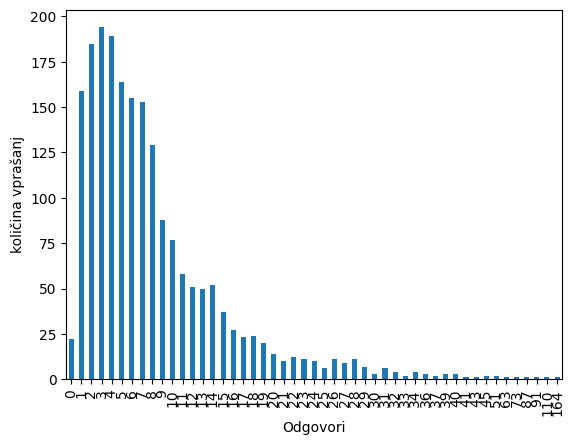

In [38]:
po_odgovorih = VPRASANJA.groupby(by = "Odgovori").size()
po_odgovorih.plot.bar(ylabel = "količina vprašanj")